In [ ]:
# Sentiment analysis goes here
#!pip install nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.naive_bayes import MultinomialNB
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer
from scipy.special import softmax
import torch
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from pprint import pprint
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from tqdm import tqdm
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer
import time
from collections import Counter
from nltk import bigrams
from collections import defaultdict
import random
from collections import defaultdict
import random
from nltk.util import ngrams
!pip install eventregistry
from eventregistry import *



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 593.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eventregistry: filename=eventregistry-9.1-py3-none-any.whl size=67625 sha256=7fec2d86bab685b83e30893b8023ff1cd386edc183d68015b4ad53e8a8e47f26
  Stored in directory: /root/.cache/pip/wheels/43/b1/a3/96973dbeb71bb960bd053bfc7113194a3c35859407e20c907f
Successfully built eventregistry


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/Fact_News.csv")
df

,uri,lang,isDuplicate,date,time,dateTime,dateTimePub,dataType,sim,url,title,body,source,authors,image,eventUri,sentiment,wgt,relevance
0,7814979975,eng,True,2023-11-02,16:50:28,2023-11-02T16:50:28Z,2023-11-02T16:43:23Z,news,0.000000,https://news.yahoo.com/dialysis-firm-fmc-sees-...,Dialysis firm FMC sees 'balanced' impact from ...,(Reuters) - The world's leading dialysis provi...,"{'uri': 'news.yahoo.com', 'dataType': 'news', ...","[{'uri': 'tristan_veyet@news.yahoo.com', 'name...",https://s.yimg.com/cv/apiv2/social/images/yaho...,NaN,-0.011765,436639828,436639828
1,7815041181,eng,False,2023-11-02,17:33:44,2023-11-02T17:33:44Z,2023-11-02T17:30:58Z,news,0.662745,https://www.cnbc.com/2023/11/02/wegovy-insured...,Novo Nordisk says 80% of insured U.S. patients...,Still life of Wegovy an injectable prescriptio...,"{'uri': 'cnbc.com', 'dataType': 'news', 'title...","[{'uri': 'annika_kim_constantino@cnbc.com', 'n...",https://image.cnbcfm.com/api/v1/image/10731082...,eng-9017732,0.050980,436642424,436642424
2,7815038786,eng,False,2023-11-02,17:31:14,2023-11-02T17:31:14Z,2023-11-02T17:21:38Z,news,0.737255,https://uk.investing.com/news/stock-market-new...,"Novo Nordisk, Lilly see insatiable demand for ...",The two companies have been the primary benefi...,"{'uri': 'uk.investing.com', 'dataType': 'news'...",[],https://i-invdn-com.investing.com/trkd-images/...,eng-9017732,0.325490,436642274,436642274
3,7815034819,eng,True,2023-11-02,17:31:09,2023-11-02T17:31:09Z,2023-11-02T17:15:50Z,news,0.000000,https://news.yahoo.com/novo-nordisk-lilly-see-...,"Novo Nordisk, Lilly see insatiable demand for ...",(Reuters) - Novo Nordisk and Eli Lilly both ex...,"{'uri': 'news.yahoo.com', 'dataType': 'news', ...","[{'uri': 'maggie_fick@news.yahoo.com', 'name':...",https://media.zenfs.com/en/reuters.com/91f7bd1...,NaN,0.356863,436642269,436642269
4,7815037665,eng,False,2023-11-02,17:30:35,2023-11-02T17:30:35Z,2023-11-02T17:21:45Z,news,0.737255,https://www.investing.com/news/stock-market-ne...,"Novo Nordisk, Lilly see insatiable demand for ...",(Reuters) - Novo Nordisk (NYSE:NVO) and Eli Li...,"{'uri': 'investing.com', 'dataType': 'news', '...",[],https://i-invdn-com.investing.com/trkd-images/...,eng-9017732,0.262745,436642235,436642235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,b-7876882892,eng,False,2023-12-08,18:07:03,2023-12-08T18:07:03Z,2023-12-08T17:56:06Z,blog,0.000000,https://www.genengnews.com/gen-edge/stockwatch...,StockWatch: Analysts Weigh Obesity Drug Market...,"[L.-R.] Liisa Bayko, managing director and res...","{'uri': 'genengnews.com', 'dataType': 'blog', ...","[{'uri': 'alex_philippidis@genengnews.com', 'n...",https://www.genengnews.com/wp-content/uploads/...,NaN,0.152941,439754823,4
1722,7876889807,eng,False,2023-12-08,18:13:03,2023-12-08T18:13:03Z,2023-12-08T18:08:31Z,news,0.725490,https://qz.com/what-eli-lilly-s-new-obesity-dr...,What Eli Lilly's new obesity drug Zepbound mea...,While a drug's list price is much usually much...,"{'uri': 'qz.com', 'dataType': 'news', 'title':...",[],"https://i.kinja-img.com/image/upload/c_fill,h_...",eng-9119112,-0.035294,439755183,18
1723,7877087230,eng,False,2023-12-08,21:16:37,2023-12-08T21:16:37Z,2023-12-08T21:07:41Z,news,0.000000,https://www.benzinga.com/general/biotech/23/12...,"Bernie Sanders To Take On Ozempic, Wegovy, Wei...",A Senate hearing led by Bernie Sanders could t...,"{'uri': 'benzinga.com', 'dataType': 'news', 't...","[{'uri': 'chris_katje@benzinga.com', 'name': '...",https://cdn.benzinga.com/files/images/story/20...,NaN,0.192157,439766197,15
1724,7876207058,eng,False,2023-12-08,10:37:12,2023-12-08T10:37:12Z,2023-12-08T10:30:00Z,news,0.454902,https://www.fool.com/investing/2023/12/08/coul...,Could Eli Lilly Beat Novo Nordisk in the Billi...,You're reading a free article with opinions th...,"{'uri': 'fool.com', 'dataType': 'news', 'title...","[{'uri': 'adria_cimino@fool.com', 'name': 'Adr...",https://g.foolcdn.com/editorial/images/757481/...,eng-9

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726 entries, 0 to 1725
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uri          1726 non-null   object 
 1   lang         1726 non-null   object 
 2   isDuplicate  1726 non-null   bool   
 3   date         1726 non-null   object 
 4   time         1726 non-null   object 
 5   dateTime     1726 non-null   object 
 6   dateTimePub  1726 non-null   object 
 7   dataType     1726 non-null   object 
 8   sim          1726 non-null   float64
 9   url          1726 non-null   object 
 10  title        1726 non-null   object 
 11  body         1726 non-null   object 
 12  source       1726 non-null   object 
 13  authors      1726 non-null   object 
 14  image        1572 non-null   object 
 15  eventUri     542 non-null    object 
 16  sentiment    1700 non-null   float64
 17  wgt          1726 non-null   int64  
 18  relevance    1726 non-null   int64  
dtypes: boo

In [ ]:
df

,uri,lang,isDuplicate,date,time,dateTime,dateTimePub,dataType,sim,url,title,body,source,authors,image,eventUri,sentiment,wgt,relevance
0,7814979975,eng,True,2023-11-02,16:50:28,2023-11-02T16:50:28Z,2023-11-02T16:43:23Z,news,0.000000,https://news.yahoo.com/dialysis-firm-fmc-sees-...,Dialysis firm FMC sees 'balanced' impact from ...,(Reuters) - The world's leading dialysis provi...,"{'uri': 'news.yahoo.com', 'dataType': 'news', ...","[{'uri': 'tristan_veyet@news.yahoo.com', 'name...",https://s.yimg.com/cv/apiv2/social/images/yaho...,NaN,-0.011765,436639828,436639828
1,7815041181,eng,False,2023-11-02,17:33:44,2023-11-02T17:33:44Z,2023-11-02T17:30:58Z,news,0.662745,https://www.cnbc.com/2023/11/02/wegovy-insured...,Novo Nordisk says 80% of insured U.S. patients...,Still life of Wegovy an injectable prescriptio...,"{'uri': 'cnbc.com', 'dataType': 'news', 'title...","[{'uri': 'annika_kim_constantino@cnbc.com', 'n...",https://image.cnbcfm.com/api/v1/image/10731082...,eng-9017732,0.050980,436642424,436642424
2,7815038786,eng,False,2023-11-02,17:31:14,2023-11-02T17:31:14Z,2023-11-02T17:21:38Z,news,0.737255,https://uk.investing.com/news/stock-market-new...,"Novo Nordisk, Lilly see insatiable demand for ...",The two companies have been the primary benefi...,"{'uri': 'uk.investing.com', 'dataType': 'news'...",[],https://i-invdn-com.investing.com/trkd-images/...,eng-9017732,0.325490,436642274,436642274
3,7815034819,eng,True,2023-11-02,17:31:09,2023-11-02T17:31:09Z,2023-11-02T17:15:50Z,news,0.000000,https://news.yahoo.com/novo-nordisk-lilly-see-...,"Novo Nordisk, Lilly see insatiable demand for ...",(Reuters) - Novo Nordisk and Eli Lilly both ex...,"{'uri': 'news.yahoo.com', 'dataType': 'news', ...","[{'uri': 'maggie_fick@news.yahoo.com', 'name':...",https://media.zenfs.com/en/reuters.com/91f7bd1...,NaN,0.356863,436642269,436642269
4,7815037665,eng,False,2023-11-02,17:30:35,2023-11-02T17:30:35Z,2023-11-02T17:21:45Z,news,0.737255,https://www.investing.com/news/stock-market-ne...,"Novo Nordisk, Lilly see insatiable demand for ...",(Reuters) - Novo Nordisk (NYSE:NVO) and Eli Li...,"{'uri': 'investing.com', 'dataType': 'news', '...",[],https://i-invdn-com.investing.com/trkd-images/...,eng-9017732,0.262745,436642235,436642235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,b-7876882892,eng,False,2023-12-08,18:07:03,2023-12-08T18:07:03Z,2023-12-08T17:56:06Z,blog,0.000000,https://www.genengnews.com/gen-edge/stockwatch...,StockWatch: Analysts Weigh Obesity Drug Market...,"[L.-R.] Liisa Bayko, managing director and res...","{'uri': 'genengnews.com', 'dataType': 'blog', ...","[{'uri': 'alex_philippidis@genengnews.com', 'n...",https://www.genengnews.com/wp-content/uploads/...,NaN,0.152941,439754823,4
1722,7876889807,eng,False,2023-12-08,18:13:03,2023-12-08T18:13:03Z,2023-12-08T18:08:31Z,news,0.725490,https://qz.com/what-eli-lilly-s-new-obesity-dr...,What Eli Lilly's new obesity drug Zepbound mea...,While a drug's list price is much usually much...,"{'uri': 'qz.com', 'dataType': 'news', 'title':...",[],"https://i.kinja-img.com/image/upload/c_fill,h_...",eng-9119112,-0.035294,439755183,18
1723,7877087230,eng,False,2023-12-08,21:16:37,2023-12-08T21:16:37Z,2023-12-08T21:07:41Z,news,0.000000,https://www.benzinga.com/general/biotech/23/12...,"Bernie Sanders To Take On Ozempic, Wegovy, Wei...",A Senate hearing led by Bernie Sanders could t...,"{'uri': 'benzinga.com', 'dataType': 'news', 't...","[{'uri': 'chris_katje@benzinga.com', 'name': '...",https://cdn.benzinga.com/files/images/story/20...,NaN,0.192157,439766197,15
1724,7876207058,eng,False,2023-12-08,10:37:12,2023-12-08T10:37:12Z,2023-12-08T10:30:00Z,news,0.454902,https://www.fool.com/investing/2023/12/08/coul...,Could Eli Lilly Beat Novo Nordisk in the Billi...,You're reading a free article with opinions th...,"{'uri': 'fool.com', 'dataType': 'news', 'title...","[{'uri': 'adria_cimino@fool.com', 'name': 'Adr...",https://g.foolcdn.com/editorial/images/757481/...,eng-9

## Preprocessing

In [ ]:
#-----No missing values and no duplicates at first glance, however dropped based on "title" as some news were equal


# Drop columns not useful for our wok
df.drop(columns=['uri', 'lang', "isDuplicate", "dateTime", "dateTimePub", "sim", "sentiment", "wgt", "relevance", "image", "source", "authors", "eventUri"], inplace=True)
df.dropna(inplace=True)

missing_values = df.isna().sum()
print(missing_values)

duplicate_rows = df[df.duplicated()]
# Display the duplicate rows
print("Duplicate Rows except first occurrence:")
print(duplicate_rows)

df.drop_duplicates(['title'], inplace=True)



date        0
time        0
dataType    0
url         0
title       0
body        0
dtype: int64
Duplicate Rows except first occurrence:
            date      time dataType  \
424   2023-11-09  02:16:09     news   
456   2023-11-09  00:16:35     news   
500   2023-11-10  01:49:22     news   
882   2023-11-15  23:14:14     news   
888   2023-11-15  22:43:38     news   
...          ...       ...      ...   
1094  2023-11-18  11:13:33     news   
1095  2023-11-18  11:06:37     news   
1096  2023-11-18  11:06:17     news   
1097  2023-11-18  09:01:13     news   
1098  2023-11-18  14:10:40     news   

                                                    url  \
424   https://news.yahoo.com/weight-loss-drug-approv...   
456   https://abcnews.go.com/Business/wireStory/fda-...   
500   https://news.yahoo.com/know-weight-loss-drug-z...   
882   https://investorshub.advfn.com/boards/read_msg...   
888   https://www.investopedia.com/catalent-anticipa...   
...                                     

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
4
df['title_original'] = df['title']

# Convert to lowercase
df['title'] = df['title'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
df['body'] = df['body'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

# Remove Punctuation
df['title'] = df['title'].apply(lambda x: re.sub('[^\w\s]', '', x))
df['body'] = df['body'].apply(lambda x: re.sub('[^\w\s]', '', x))

# Download stopwords
nltk.download('stopwords')

# Apply stopwords removal
stop_words = set(stopwords.words('english'))
df['title'] = df['title'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))
df['body'] = df['body'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))

# Tokenization
df['title'] = df['title'].apply(lambda x: re.split('\W+', x))
df['body'] = df['body'].apply(lambda x: re.split('\W+', x))

# Display the modified DataFrame
print(df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


         date      time dataType  \
0  2023-11-02  16:50:28     news   
1  2023-11-02  17:33:44     news   
2  2023-11-02  17:31:14     news   
3  2023-11-02  17:31:09     news   
5  2023-11-02  17:29:37     blog   

                                                 url  \
0  https://news.yahoo.com/dialysis-firm-fmc-sees-...   
1  https://www.cnbc.com/2023/11/02/wegovy-insured...   
2  https://uk.investing.com/news/stock-market-new...   
3  https://news.yahoo.com/novo-nordisk-lilly-see-...   
5  http://uk.advfn.com/stock-market/share-news/Ne...   

                                               title  \
0  [dialysis, firm, fmc, sees, balanced, impact, ...   
1  [novo, nordisk, says, 80, insured, us, patient...   
2  [novo, nordisk, lilly, see, insatiable, demand...   
3  [novo, nordisk, lilly, see, insatiable, demand...   
5        [news, highlights, top, company, news, day]   

                                                body  \
0  [reuters, worlds, leading, dialysis, provider,... 

In [ ]:
df

,date,time,dataType,url,title,body,title_original
0,2023-11-02,16:50:28,news,https://news.yahoo.com/dialysis-firm-fmc-sees-...,"[dialysis, firm, fmc, sees, balanced, impact, ...","[reuters, worlds, leading, dialysis, provider,...",Dialysis firm FMC sees 'balanced' impact from ...
1,2023-11-02,17:33:44,news,https://www.cnbc.com/2023/11/02/wegovy-insured...,"[novo, nordisk, says, 80, insured, us, patient...","[still, life, wegovy, injectable, prescription...",Novo Nordisk says 80% of insured U.S. patients...
2,2023-11-02,17:31:14,news,https://uk.investing.com/news/stock-market-new...,"[novo, nordisk, lilly, see, insatiable, demand...","[two, companies, primary, beneficiaries, globa...","Novo Nordisk, Lilly see insatiable demand for ..."
3,2023-11-02,17:31:09,news,https://news.yahoo.com/novo-nordisk-lilly-see-...,"[novo, nordisk, lilly, see, insatiable, demand...","[reuters, novo, nordisk, eli, lilly, expect, j...","Novo Nordisk, Lilly see insatiable demand for ..."
5,2023-11-02,17:29:37,blog,http://uk.advfn.com/stock-market/share-news/Ne...,"[news, highlights, top, company, news, day]","[republic, first, bancorps, stock, rockets, se...",News Highlights: Top Company News of the Day
...,...,...,...,...,...,...,...
1721,2023-12-08,18:07:03,blog,https://www.genengnews.com/gen-edge/stockwatch...,"[stockwatch, analysts, weigh, obesity, drug, m...","[lr, liisa, bayko, managing, director, researc...",StockWatch: Analysts Weigh Obesity Drug Market...
1722,2023-12-08,18:13:03,news,https://qz.com/what-eli-lilly-s-new-obesity-dr...,"[eli, lillys, new, obesity, drug, zepbound, me...","[drugs, list, price, much, usually, much, high...",What Eli Lilly's new obesity drug Zepbound mea...
1723,2023-12-08,21:16:37,news,https://www.benzinga.com/general/biotech/23/12...,"[bernie, sanders, take, ozempic, wegovy, weigh...","[senate, hearing, led, bernie, sanders, could,...","Bernie Sanders To Take On Ozempic, Wegovy, Wei..."
1724,2023-12-08,10:37:12,news,https://www.fool.com/investing/2023/12/08/coul...,"[could, eli, lilly, beat, novo, nordisk, billi...","[youre, reading, free, article, opinions, may,...",Could Eli Lilly Beat Novo Nordisk in the Billi...


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# Lemmatization
wnl = WordNetLemmatizer()
def get_wordnet(pos):
    if pos.startswith('N'):
        return wordnet.NOUN
    elif pos.startswith('V'):
        return wordnet.VERB
    elif pos.startswith('J'):
        return wordnet.ADJ
    elif pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
def lemmatizer(text):
    pos_tags = pos_tag(text)
    text = [wnl.lemmatize(word, pos=get_wordnet(pos)) for word, pos in pos_tags]
    return text

df['title'] = df['title'].apply(lambda x: lemmatizer(x))
df['body'] = df['body'].apply(lambda x: lemmatizer(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
df

,date,time,dataType,url,title,body,title_original
0,2023-11-02,16:50:28,news,https://news.yahoo.com/dialysis-firm-fmc-sees-...,"[dialysis, firm, fmc, see, balance, impact, gl...","[reuters, world, lead, dialysis, provider, fre...",Dialysis firm FMC sees 'balanced' impact from ...
1,2023-11-02,17:33:44,news,https://www.cnbc.com/2023/11/02/wegovy-insured...,"[novo, nordisk, say, 80, insured, u, patient, ...","[still, life, wegovy, injectable, prescription...",Novo Nordisk says 80% of insured U.S. patients...
2,2023-11-02,17:31:14,news,https://uk.investing.com/news/stock-market-new...,"[novo, nordisk, lilly, see, insatiable, demand...","[two, company, primary, beneficiary, global, b...","Novo Nordisk, Lilly see insatiable demand for ..."
3,2023-11-02,17:31:09,news,https://news.yahoo.com/novo-nordisk-lilly-see-...,"[novo, nordisk, lilly, see, insatiable, demand...","[reuters, novo, nordisk, eli, lilly, expect, j...","Novo Nordisk, Lilly see insatiable demand for ..."
5,2023-11-02,17:29:37,blog,http://uk.advfn.com/stock-market/share-news/Ne...,"[news, highlight, top, company, news, day]","[republic, first, bancorps, stock, rocket, sea...",News Highlights: Top Company News of the Day
...,...,...,...,...,...,...,...
1721,2023-12-08,18:07:03,blog,https://www.genengnews.com/gen-edge/stockwatch...,"[stockwatch, analyst, weigh, obesity, drug, ma...","[lr, liisa, bayko, manage, director, research,...",StockWatch: Analysts Weigh Obesity Drug Market...
1722,2023-12-08,18:13:03,news,https://qz.com/what-eli-lilly-s-new-obesity-dr...,"[eli, lillys, new, obesity, drug, zepbound, me...","[drug, list, price, much, usually, much, high,...",What Eli Lilly's new obesity drug Zepbound mea...
1723,2023-12-08,21:16:37,news,https://www.benzinga.com/general/biotech/23/12...,"[bernie, sander, take, ozempic, wegovy, weight...","[senate, hearing, lead, bernie, sander, could,...","Bernie Sanders To Take On Ozempic, Wegovy, Wei..."
1724,2023-12-08,10:37:12,news,https://www.fool.com/investing/2023/12/08/coul...,"[could, eli, lilly, beat, novo, nordisk, billi...","[youre, read, free, article, opinion, may, dif...",Could Eli Lilly Beat Novo Nordisk in the Billi...


## Labelling with Lexicon VADER

In [ ]:
# Convert the lists in the 'body' column back to strings
df['body'] = df['body'].apply(lambda x: ' '.join(x))

# Initialize the VADER sentiment intensity analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Define a function to get the sentiment score for each article
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Apply the function to the 'body' column and create a new column 'sentiment_score'
df['sentiment_score'] = df['body'].apply(get_sentiment_score)
df['sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score > 0.5 else ('neutral' if 0 <= score <= 0.5 else 'negative'))

# Display the DataFrame with the sentiment scores
print(df[['body', 'sentiment_score', 'sentiment']])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                                   body  sentiment_score  \
0     reuters world lead dialysis provider fresenius...          -0.4019   
1     still life wegovy injectable prescription weig...           0.6240   
2     two company primary beneficiary global boom ob...           0.9941   
3     reuters novo nordisk eli lilly expect juggerna...           0.9940   
5     republic first bancorps stock rocket seal 35m ...           0.7972   
...                                                 ...              ...   
1721  lr liisa bayko manage director research analys...           0.9953   
1722  drug list price much usually much high whats p...           0.6518   
1723  senate hearing lead bernie sander could throw ...           0.9501   
1724  youre read free article opinion may differ mot...           0.9868   
1725  youre read free article opinion may differ mot...           0.9966   

     sentiment  
0     negative  
1     positive  
2     positive  
3     positive  
5 

In [ ]:
df['sentiment'].value_counts()

positive    818
negative    296
neutral      58
Name: sentiment, dtype: int64

In [ ]:
df

,date,time,dataType,url,title,body,title_original,sentiment_score,sentiment
0,2023-11-02,16:50:28,news,https://news.yahoo.com/dialysis-firm-fmc-sees-...,"[dialysis, firm, fmc, see, balance, impact, gl...",reuters world lead dialysis provider fresenius...,Dialysis firm FMC sees 'balanced' impact from ...,-0.4019,negative
1,2023-11-02,17:33:44,news,https://www.cnbc.com/2023/11/02/wegovy-insured...,"[novo, nordisk, say, 80, insured, u, patient, ...",still life wegovy injectable prescription weig...,Novo Nordisk says 80% of insured U.S. patients...,0.6240,positive
2,2023-11-02,17:31:14,news,https://uk.investing.com/news/stock-market-new...,"[novo, nordisk, lilly, see, insatiable, demand...",two company primary beneficiary global boom ob...,"Novo Nordisk, Lilly see insatiable demand for ...",0.9941,positive
3,2023-11-02,17:31:09,news,https://news.yahoo.com/novo-nordisk-lilly-see-...,"[novo, nordisk, lilly, see, insatiable, demand...",reuters novo nordisk eli lilly expect juggerna...,"Novo Nordisk, Lilly see insatiable demand for ...",0.9940,positive
5,2023-11-02,17:29:37,blog,http://uk.advfn.com/stock-market/share-news/Ne...,"[news, highlight, top, company, news, day]",republic first bancorps stock rocket seal 35m ...,News Highlights: Top Company News of the Day,0.7972,positive
...,...,...,...,...,...,...,...,...,...
1721,2023-12-08,18:07:03,blog,https://www.genengnews.com/gen-edge/stockwatch...,"[stockwatch, analyst, weigh, obesity, drug, ma...",lr liisa bayko manage director research analys...,StockWatch: Analysts Weigh Obesity Drug Market...,0.9953,positive
1722,2023-12-08,18:13:03,news,https://qz.com/what-eli-lilly-s-new-obesity-dr...,"[eli, lillys, new, obesity, drug, zepbound, me...",drug list price much usually much high whats p...,What Eli Lilly's new obesity drug Zepbound mea...,0.6518,positive
1723,2023-12-08,21:16:37,news,https://www.benzinga.com/general/biotech/23/12...,"[bernie, sander, take, ozempic, wegovy, weight...",senate hearing lead bernie sander could throw ...,"Bernie Sanders To Take On Ozempic, Wegovy, Wei...",0.9501,positive
1724,2023-12-08,10:37:12,news,https://www.fool.com/investing/2023/12/08/coul...,"[could, eli, lilly, beat, novo, nordisk, billi...",youre read free article opinion may differ mot...,Could Eli Lilly Beat Novo Nordisk in the Billi...,0.9868,positive


##Todo:
- LDA x Topic Modeling
- Visualizations x VADER
- Wordcloud

In [ ]:
#download dataset
# Assuming df_topic is your DataFrame
df.to_csv('df.csv', index=False)


## Latent Dirichlet Allocation for Topic Modeling

Dictionary and Corpus for LDA

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import copy
# Tokenize each string of the body columns into a list of words
# Tokenized_body will be a tokenized list
df['tokenized_body'] = df['body'].apply(word_tokenize)

# Create the dictionary using the 'tokenized body' column
dictionary = Dictionary(df['tokenized_body'])
print(f'Total vocabulary size: {len(dictionary)}')
dictionary1 = copy.copy(dictionary) #create copy to make trial of lda with words filtering

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Total vocabulary size: 25915


In [ ]:
# Create the corpus
corpus = [dictionary.doc2bow(doc) for doc in df['tokenized_body']]

In [ ]:
dict_corpus = {}
for i in range(len(corpus)):
    for idx, freq in corpus[i]:
        word = dictionary.get(idx)  # Use get() to handle non-existent keys
        if word:
            if word in dict_corpus:
                dict_corpus[word] += freq
            else:
                dict_corpus[word] = freq

df_dict = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['frequency'])
# Top 10 high-frequency words
df_dict.sort_values('frequency', ascending=False).head(20)


,frequency
drug,7421
say,5728
weight,4984
company,3663
year,3453
loss,3341
patient,3293
obesity,3198
wegovy,3112
novo,2730


In [ ]:
# Generate a test corpus
corpus_test = [dictionary.doc2bow(doc) for doc in df['tokenized_body'][0:3919]]

In [ ]:
num_topics = 3
passes = 60
total_iteration = num_topics*passes

In [ ]:
start_time =time.time()
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# train the LdaModel
lda_model = LdaModel(corpus=corpus_test, id2word=dictionary, num_topics=num_topics, passes=passes, random_state=100)

end_time=time.time()
total_time = end_time - start_time
print(f"Total time taken: {total_time:.2f} seconds")

Total time taken: 176.51 seconds


In [ ]:
# Display topics
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('drug', 0.022287613),
   ('weight', 0.015734026),
   ('say', 0.014407274),
   ('loss', 0.009291259),
   ('patient', 0.00918088),
   ('ozempic', 0.00883214),
   ('wegovy', 0.008814504),
   ('obesity', 0.008797003),
   ('diabetes', 0.007883461),
   ('people', 0.0077618086)]),
 (1,
  [('company', 0.009571843),
   ('year', 0.008385802),
   ('market', 0.007038873),
   ('growth', 0.006968595),
   ('quarter', 0.0050048395),
   ('stock', 0.004909078),
   ('share', 0.0047642454),
   ('revenue', 0.0046253246),
   ('sale', 0.0041992865),
   ('see', 0.0041978396)]),
 (2,
  [('say', 0.012017095),
   ('company', 0.0074389996),
   ('u', 0.0062419255),
   ('drug', 0.0057005514),
   ('year', 0.0055478755),
   ('novo', 0.0053854673),
   ('market', 0.005174009),
   ('billion', 0.004619779),
   ('report', 0.0036961583),
   ('new', 0.0036841554)])]


In [ ]:
#Compute Coherence Score
cm = CoherenceModel(model=lda_model, corpus = corpus, coherence='c_v', texts=df['tokenized_body'])
coherence = cm.get_coherence()

print(f'Coherence score: {coherence}')

Coherence score: 0.44010559734110233


In [ ]:
df

,date,time,dataType,url,title,body,title_original,sentiment_score,sentiment,tokenized_body
0,2023-11-02,16:50:28,news,https://news.yahoo.com/dialysis-firm-fmc-sees-...,"[dialysis, firm, fmc, see, balance, impact, gl...",reuters world lead dialysis provider fresenius...,Dialysis firm FMC sees 'balanced' impact from ...,-0.4019,negative,"[reuters, world, lead, dialysis, provider, fre..."
1,2023-11-02,17:33:44,news,https://www.cnbc.com/2023/11/02/wegovy-insured...,"[novo, nordisk, say, 80, insured, u, patient, ...",still life wegovy injectable prescription weig...,Novo Nordisk says 80% of insured U.S. patients...,0.6240,positive,"[still, life, wegovy, injectable, prescription..."
2,2023-11-02,17:31:14,news,https://uk.investing.com/news/stock-market-new...,"[novo, nordisk, lilly, see, insatiable, demand...",two company primary beneficiary global boom ob...,"Novo Nordisk, Lilly see insatiable demand for ...",0.9941,positive,"[two, company, primary, beneficiary, global, b..."
3,2023-11-02,17:31:09,news,https://news.yahoo.com/novo-nordisk-lilly-see-...,"[novo, nordisk, lilly, see, insatiable, demand...",reuters novo nordisk eli lilly expect juggerna...,"Novo Nordisk, Lilly see insatiable demand for ...",0.9940,positive,"[reuters, novo, nordisk, eli, lilly, expect, j..."
5,2023-11-02,17:29:37,blog,http://uk.advfn.com/stock-market/share-news/Ne...,"[news, highlight, top, company, news, day]",republic first bancorps stock rocket seal 35m ...,News Highlights: Top Company News of the Day,0.7972,positive,"[republic, first, bancorps, stock, rocket, sea..."
...,...,...,...,...,...,...,...,...,...,...
1721,2023-12-08,18:07:03,blog,https://www.genengnews.com/gen-edge/stockwatch...,"[stockwatch, analyst, weigh, obesity, drug, ma...",lr liisa bayko manage director research analys...,StockWatch: Analysts Weigh Obesity Drug Market...,0.9953,positive,"[lr, liisa, bayko, manage, director, research,..."
1722,2023-12-08,18:13:03,news,https://qz.com/what-eli-lilly-s-new-obesity-dr...,"[eli, lillys, new, obesity, drug, zepbound, me...",drug list price much usually much high whats p...,What Eli Lilly's new obesity drug Zepbound mea...,0.6518,positive,"[drug, list, price, much, usually, much, high,..."
1723,2023-12-08,21:16:37,news,https://www.benzinga.com/general/biotech/23/12...,"[bernie, sander, take, ozempic, wegovy, weight...",senate hearing lead bernie sander could throw ...,"Bernie Sanders To Take On Ozempic, Wegovy, Wei...",0.9501,positive,"[senate, hearing, lead, bernie, sander, could,..."
1724,2023-12-08,10:37:12,news,https://www.fool.com/investing/2023/12/08/coul...,"[could, eli, lilly, beat, novo, nordisk, billi...",youre read free article opinion may differ mot...,Could Eli Lilly Beat Novo Nordisk in the Billi...,0.9868,positive,"[youre, read, free, article, opinion, may, dif..."


In [ ]:
#download dataset
# Assuming df_topic is your DataFrame
df.to_csv('df_final.csv', index=False)


## Identification of Topics

In [ ]:
#get the topic distribution for each tweets
topic_dist = [lda_model[doc] for doc in corpus]
#get the dominant topic and the score
dominant_topic = [max(topic, key=lambda x:x[1])[0] for topic in topic_dist]
scores =[max(topic, key=lambda x:x[1])[1] for topic in topic_dist]
# Create a dataframe to show dominant topic for each tweet
df_topic = df[['tokenized_body', 'body', "sentiment"]].copy()
df_topic['Dominant_Topic'] = [topic + 1 for topic in dominant_topic]
df_topic['Contribution%'] = [round(score * 100, 2) for score in scores]
df_topic.head()


,tokenized_body,body,sentiment,Dominant_Topic,Contribution%
0,"[reuters, world, lead, dialysis, provider, fre...",reuters world lead dialysis provider fresenius...,negative,3,53.53
1,"[still, life, wegovy, injectable, prescription...",still life wegovy injectable prescription weig...,positive,1,85.99
2,"[two, company, primary, beneficiary, global, b...",two company primary beneficiary global boom ob...,positive,2,49.67
3,"[reuters, novo, nordisk, eli, lilly, expect, j...",reuters novo nordisk eli lilly expect juggerna...,positive,2,46.05
5,"[republic, first, bancorps, stock, rocket, sea...",republic first bancorps stock rocket seal 35m ...,positive,3,81.72


In [ ]:
#find dominant topic percentage
df_topic_summary = df_topic.groupby('Dominant_Topic').agg({'body':'count'}).copy().reset_index()
df_topic_summary.rename(columns={'body':'Total_news'}, inplace=True)
df_topic_summary['Percentage%'] = round(df_topic_summary['Total_news']/df_topic.shape[0]*100,2)
df_topic_summary=df_topic_summary.sort_values('Total_news', ascending=False).reset_index(drop=True)
df_topic_summary

,Dominant_Topic,Total_news,Percentage%
0,1,638,54.44
1,3,286,24.40
2,2,248,21.16


In [ ]:
#Summarize the topic names based on each topics' top terms and highly-relevant tweets
# Updated topic names
names = {
    1: "T1: Wegovy in Diabetes Medication and Weight Loss",
    2: "T2: Financial Performance of Novo Nordisk",
    3: "T3: Pharmaceutical Business and Obesity Treatment Trends"
}

# Update the 'Topic_Name' in df_topic
df_topic['Topic_Name'] = df_topic['Dominant_Topic'].map(names)
#generate the topics list with correct terms for each topic
# Correct terms for each topic
topics = [
    # Topic 1: Financial Performance of Novo Nordisk
    [(term, round(weight, 3)) for term, weight in lda_model.show_topic(0, topn=20)],

    # Topic 2: Wegovy in Diabetes Medication and Weight Loss
    [(term, round(weight, 3)) for term, weight in lda_model.show_topic(1, topn=20)],

    # Topic 3: Pharmaceutical Business and Obesity Treatment Trends
    [(term, round(weight, 3)) for term, weight in lda_model.show_topic(2, topn=20)]
]


# Update topic_df
topic_df = pd.DataFrame({
    'Topic_Name': names.values(),
    'Topic_Terms': [','.join([term for term, weight in topic]) for topic in topics]
}, index=['Topic ' + str(n) for n in range(1, lda_model.num_topics + 1)])

# Update Tweet counts if necessary
df_temp = df_topic_summary.sort_values('Dominant_Topic')
topic_df['news_count'] = df_temp['Total_news'].values

topic_df



,Topic_Name,Topic_Terms,news_count
Topic 1,T1: Wegovy in Diabetes Medication and Weight Loss,"drug,weight,say,loss,patient,ozempic,wegovy,ob...",638
Topic 2,T2: Financial Performance of Novo Nordisk,"company,year,market,growth,quarter,stock,share...",248
Topic 3,T3: Pharmaceutical Business and Obesity Treatm...,"say,company,u,drug,year,novo,market,billion,re...",286


In [ ]:
custom_palette = ['#3B97DE'
 ,'#005AD2'
,'#2A918B'
,'#EEA7BF'
,'#939AA7'
,'#CCC5BD']

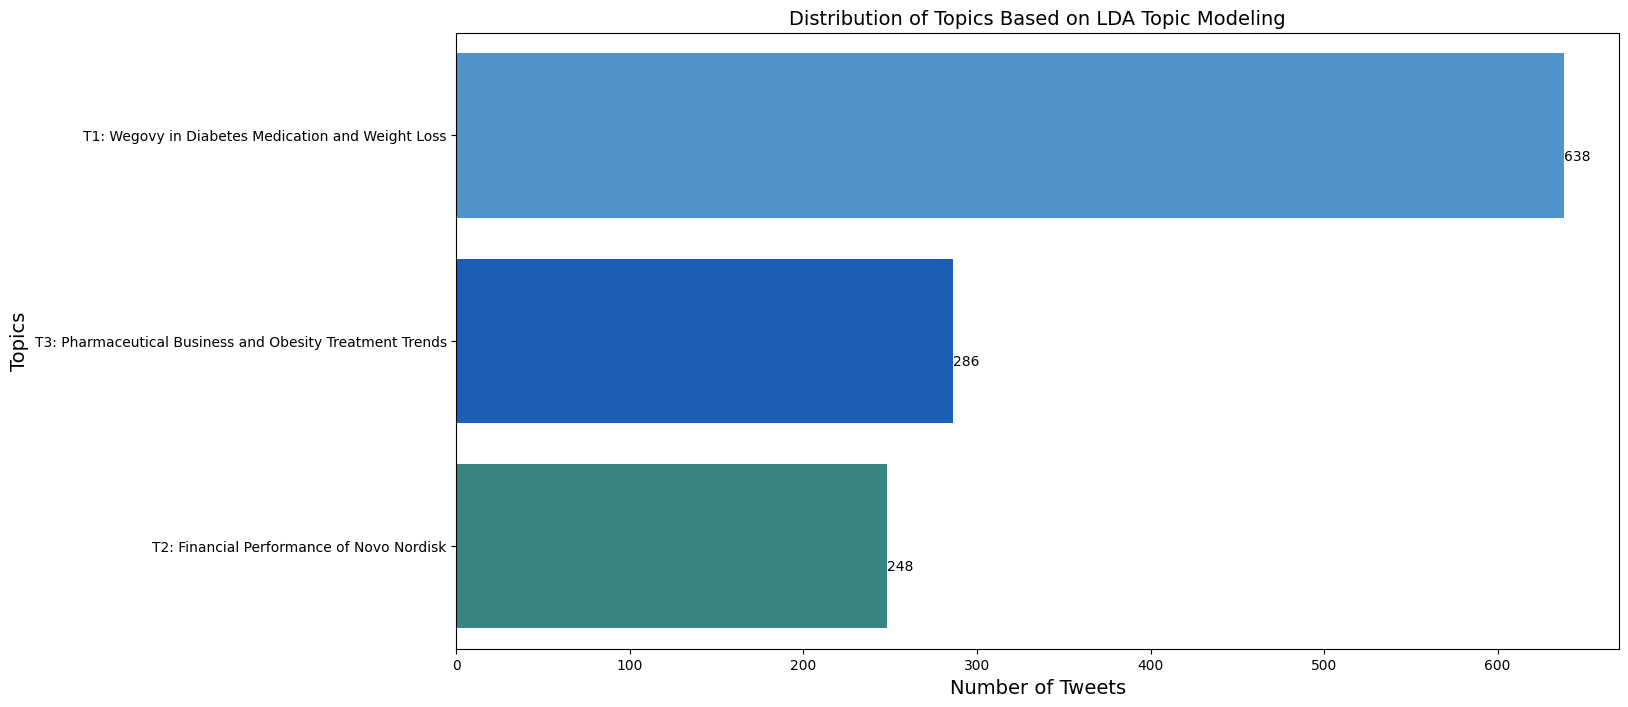

In [ ]:
#plot a bar chart to show the number of tweets for each topic
sort_name = topic_df.sort_values('news_count',ascending=False)['Topic_Name'].to_list()
fig,ax = plt.subplots(1,1,figsize=(15,8))
ax = sns.barplot(y=topic_df['Topic_Name'], x=topic_df['news_count'], order=sort_name, palette=custom_palette)
for i in ax.patches:
    ax.annotate(int(i.get_width()), (i.get_width(), i.get_y()+0.5), va='center')
ax.set_ylabel('Topics', size=14)
ax.set_xlabel('Number of Tweets', size=14)
ax.set_title('Distribution of Topics Based on LDA Topic Modeling', size=14)

plt.show()

##Vader Sentiment Analysis

In [ ]:
data_2 = df_topic.copy()
data_2['Polarity_VADER'] = data_2["tokenized_body"].apply(lambda x: sia.polarity_scores(' '.join(x)))
data_2['Polarity_VADER'] = data_2['Polarity_VADER'].apply(lambda x: x['compound'])
data_2['Sentiment_VADER'] = data_2['sentiment']


<ipython-input-32-4336340c8351>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_2['Polarity_VADER'], shade=True, legend='Vader', alpha=0.8, color='#005AD2')


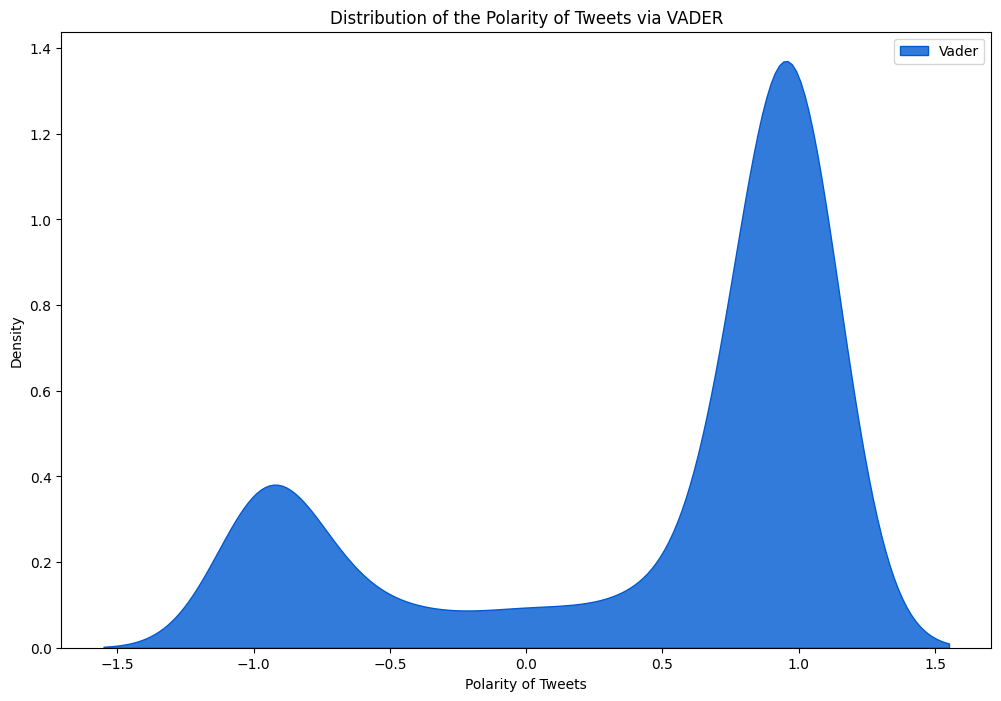

In [ ]:

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the KDE plot with the desired color
sns.kdeplot(data_2['Polarity_VADER'], shade=True, legend='Vader', alpha=0.8, color='#005AD2')

# Set x-axis label and title
ax.set_xlabel('Polarity of Tweets')
ax.set_title('Distribution of the Polarity of Tweets via VADER')

# Add legend
plt.legend(['Vader'])

# Show the plot
plt.show()


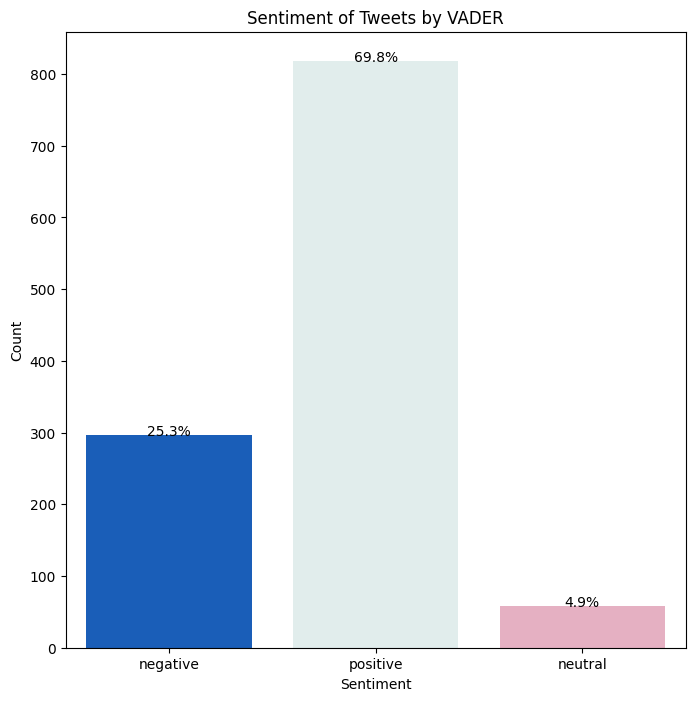

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your palette
palette = ['#005AD2', '#DFEFEE', '#EEA7BF']

# Set the custom palette
sns.set_palette(palette)

# Assuming data_2 is your DataFrame
# Create a bar plot for Sentiment_VADER
fig, ax = plt.subplots(figsize=(8, 8))
sns.countplot(x='Sentiment_VADER', data=data_2, palette=palette, ax=ax)

# Add percentage labels
total = len(data_2['Sentiment_VADER'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{height/total:.1%}', ha="center")

# Customize the plot
plt.title('Sentiment of Tweets by VADER')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.show()


## Sentiment of each topic

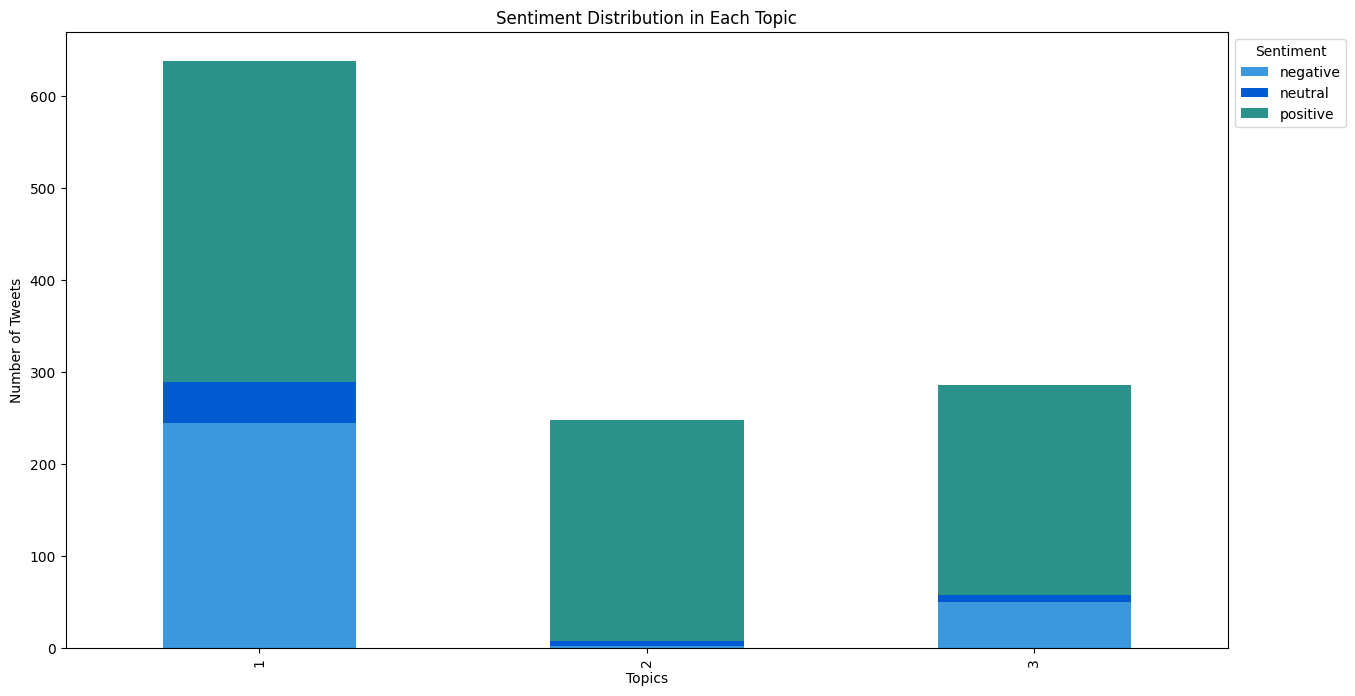

In [ ]:
# Assuming 'data_2' is your DataFrame with sentiment analysis using VADER
# Assuming 'topic_df' is your DataFrame with topic information

# Combine sentiment and topic information
topic_sentiment = pd.merge(df_topic, data_2[['Polarity_VADER', 'Sentiment_VADER']], left_index=True, right_index=True)

# Count the number of tweets for each combination of topic and sentiment
topic_sentiment_count = topic_sentiment.groupby(['Dominant_Topic', 'Sentiment_VADER']).size().unstack(fill_value=0)

# Plot a stacked bar chart for sentiment distribution in each topic
fig, ax = plt.subplots(figsize=(15, 8))
topic_sentiment_count.plot(kind='bar', stacked=True, color=custom_palette, ax=ax)
ax.set_ylabel('Number of Tweets')
ax.set_xlabel('Topics')
ax.set_title('Sentiment Distribution in Each Topic')
plt.legend(title='Sentiment', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


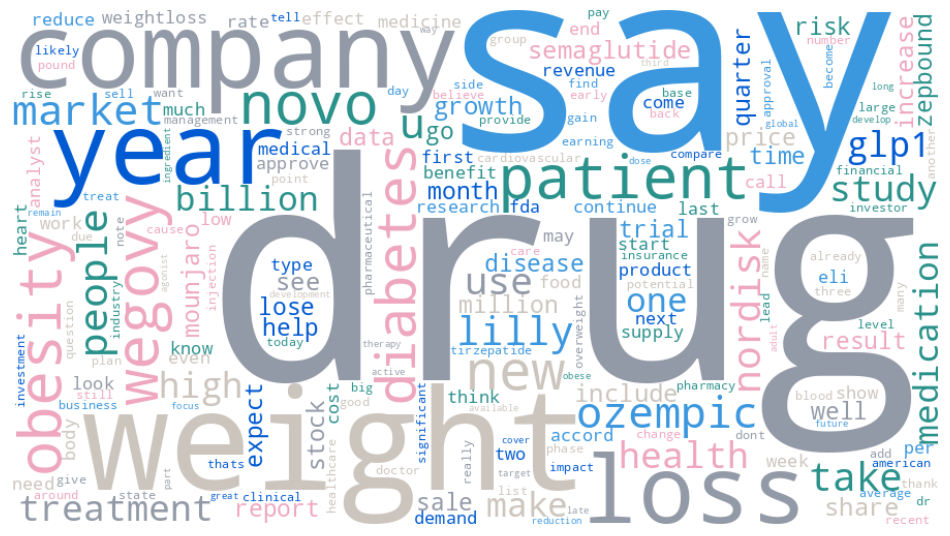

In [ ]:
import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Convert the 'body' column to string
df["body"] = df["body"].astype(str)

# Concatenate all tweets into a single string
text = ' '.join(set(df["body"]))

# Define the stop words
stopwords = set(stopwords.words('english'))

# Create a custom colormap
custom_cmap = ListedColormap(custom_palette)

# Create the WordCloud object with custom colors
wordcloud = WordCloud(width=900, height=500, background_color='white', colormap=custom_cmap, collocations=False).generate(text)

# Plot the WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
#download dataset
# Assuming df_topic is your DataFrame
df_topic.to_csv('df_topic_final.csv', index=False)




In [ ]:
df_topic

,tokenized_body,body,sentiment,Dominant_Topic,Contribution%,Topic_Name
0,"[reuters, world, lead, dialysis, provider, fre...",reuters world lead dialysis provider fresenius...,negative,3,53.53,T3: Pharmaceutical Business and Obesity Treatm...
1,"[still, life, wegovy, injectable, prescription...",still life wegovy injectable prescription weig...,positive,1,85.99,T1: Wegovy in Diabetes Medication and Weight Loss
2,"[two, company, primary, beneficiary, global, b...",two company primary beneficiary global boom ob...,positive,2,49.67,T2: Financial Performance of Novo Nordisk
3,"[reuters, novo, nordisk, eli, lilly, expect, j...",reuters novo nordisk eli lilly expect juggerna...,positive,2,46.05,T2: Financial Performance of Novo Nordisk
5,"[republic, first, bancorps, stock, rocket, sea...",republic first bancorps stock rocket seal 35m ...,positive,3,81.72,T3: Pharmaceutical Business and Obesity Treatm...
...,...,...,...,...,...,...
1721,"[lr, liisa, bayko, manage, director, research,...",lr liisa bayko manage director research analys...,positive,2,66.60,T2: Financial Performance of Novo Nordisk
1722,"[drug, list, price, much, usually, much, high,...",drug list price much usually much high whats p...,positive,1,97.12,T1: Wegovy in Diabetes Medication and Weight Loss
1723,"[senate, hearing, lead, bernie, sander, could,...",senate hearing lead bernie sander could throw ...,positive,1,56.95,T1: Wegovy in Diabetes Medication and Weight Loss
1724,"[youre, read, free, article, opinion, may, dif...",youre read free article opinion may differ mot...,positive,1,62.94,T1: Wegovy in Diabetes Medication and Weight Loss


In [ ]:

df

,date,time,dataType,url,title,body,title_original,sentiment_score,sentiment,tokenized_body
0,2023-11-02,16:50:28,news,https://news.yahoo.com/dialysis-firm-fmc-sees-...,"[dialysis, firm, fmc, see, balance, impact, gl...",reuters world lead dialysis provider fresenius...,Dialysis firm FMC sees 'balanced' impact from ...,-0.4019,negative,"[reuters, world, lead, dialysis, provider, fre..."
1,2023-11-02,17:33:44,news,https://www.cnbc.com/2023/11/02/wegovy-insured...,"[novo, nordisk, say, 80, insured, u, patient, ...",still life wegovy injectable prescription weig...,Novo Nordisk says 80% of insured U.S. patients...,0.6240,positive,"[still, life, wegovy, injectable, prescription..."
2,2023-11-02,17:31:14,news,https://uk.investing.com/news/stock-market-new...,"[novo, nordisk, lilly, see, insatiable, demand...",two company primary beneficiary global boom ob...,"Novo Nordisk, Lilly see insatiable demand for ...",0.9941,positive,"[two, company, primary, beneficiary, global, b..."
3,2023-11-02,17:31:09,news,https://news.yahoo.com/novo-nordisk-lilly-see-...,"[novo, nordisk, lilly, see, insatiable, demand...",reuters novo nordisk eli lilly expect juggerna...,"Novo Nordisk, Lilly see insatiable demand for ...",0.9940,positive,"[reuters, novo, nordisk, eli, lilly, expect, j..."
5,2023-11-02,17:29:37,blog,http://uk.advfn.com/stock-market/share-news/Ne...,"[news, highlight, top, company, news, day]",republic first bancorps stock rocket seal 35m ...,News Highlights: Top Company News of the Day,0.7972,positive,"[republic, first, bancorps, stock, rocket, sea..."
...,...,...,...,...,...,...,...,...,...,...
1721,2023-12-08,18:07:03,blog,https://www.genengnews.com/gen-edge/stockwatch...,"[stockwatch, analyst, weigh, obesity, drug, ma...",lr liisa bayko manage director research analys...,StockWatch: Analysts Weigh Obesity Drug Market...,0.9953,positive,"[lr, liisa, bayko, manage, director, research,..."
1722,2023-12-08,18:13:03,news,https://qz.com/what-eli-lilly-s-new-obesity-dr...,"[eli, lillys, new, obesity, drug, zepbound, me...",drug list price much usually much high whats p...,What Eli Lilly's new obesity drug Zepbound mea...,0.6518,positive,"[drug, list, price, much, usually, much, high,..."
1723,2023-12-08,21:16:37,news,https://www.benzinga.com/general/biotech/23/12...,"[bernie, sander, take, ozempic, wegovy, weight...",senate hearing lead bernie sander could throw ...,"Bernie Sanders To Take On Ozempic, Wegovy, Wei...",0.9501,positive,"[senate, hearing, lead, bernie, sander, could,..."
1724,2023-12-08,10:37:12,news,https://www.fool.com/investing/2023/12/08/coul...,"[could, eli, lilly, beat, novo, nordisk, billi...",youre read free article opinion may differ mot...,Could Eli Lilly Beat Novo Nordisk in the Billi...,0.9868,positive,"[youre, read, free, article, opinion, may, dif..."


In [ ]:
df.to_excel('df_final.xlsx', index=False)
